In [1]:
import BCI_analysis
import matplotlib.pyplot as plt
import os
import numpy as np

No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally


In [2]:
sessionwise_base_dir = '/home/jupyter/bucket/Data/Calcium_imaging/sessionwise_tba'
s2p_base_dir = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim'


In [3]:
subject = 'BCI_40'
fov = 'FOV_01'
files = os.listdir(os.path.join(sessionwise_base_dir,subject))
data_dict = {}
sessions = []
session_files = []
for file in files:
    if fov in file:
        session = file[len(subject)+1:-1*(len(fov)+5)]
        sessions.append(session)
        session_files.append(file)
        
for session,session_file in zip(sessions,session_files):
    data_dict[session] = BCI_analysis.io_python.read_sessionwise_npy(os.path.join(sessionwise_base_dir,subject,session_file))
    data_dict[session]['F_ch2_sessionwise'] = np.load(os.path.join(s2p_base_dir,subject,fov,session,'F_chan2.npy'))
    
    data_dict[session]['Fneu_ch2_sessionwise'] = np.load(os.path.join(s2p_base_dir,subject,fov,session,'Fneu_chan2.npy'))
    print(session_file)
    #break
stat = np.load(os.path.join(s2p_base_dir,subject,fov,'stat.npy'),allow_pickle=True).tolist()
sessions = np.sort(list(data_dict.keys()))
cn_list = []
for session in sessions:
    try:
        cn_list.append(int(np.nanmedian(np.asarray(data_dict[session]['cn'])[np.asarray(data_dict[session]['cn'])!=None])))
    except:
        pass
    #%
cn_list = np.unique(cn_list)
#%

last_session = sessions[-1]

BCI_40-072522-FOV_01.npy
BCI_40-072722-FOV_01.npy
BCI_40-072822-FOV_01.npy


In [37]:
session = '072822'

data_dict[session].keys()


dict_keys(['file_path', 'file_name', 'subject', 'F_sessionwise', 'F_trialwise_all', 'F_trialwise_closed_loop', 'dff_sessionwise', 'dff_trialwise_all', 'dff_trialwise_closed_loop', 'cn', 'roiX', 'roiY', 'dist', 'FOV', 'session_date', 'session_path', 'mouse', 'mean_image', 'max_image', 'time_since_trial_start', 'go_cue_times', 'lick_times', 'reward_times', 'trial_times', 'hit', 'threshold_crossing_times', 'zaber_move_forward', 'sampling_rate', 'all_si_filenames', 'closed_loop_filenames', 'all_si_frame_nums', 'photon_counts', 'f0_scalar', 'F_ch2_sessionwise', 'Fneu_ch2_sessionwise'])

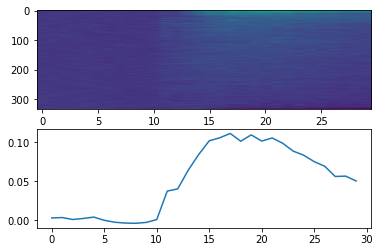

In [101]:
step_back = 10
step_forward = 20
reference = 'go_cue_times' #'go_cue_times', 'lick_times' , 'reward_times'
trace_to_use = 'F_sessionwise' #'Fneu_ch2_sessionwise' #'F_sessionwise' 'F_ch2_sessionwise'
event_indices = BCI_analysis.io_suite2p.trial_times_to_session_indices (data_dict[session]['all_si_frame_nums'],
                                                                        data_dict[session]['all_si_filenames'],
                                                                        data_dict[session]['closed_loop_filenames'],
                                                                        data_dict[session][reference],
                                                                        data_dict[session]['sampling_rate'])
F_aligned = BCI_analysis.io_suite2p.align_trace_to_event(data_dict[session][trace_to_use],
                                                         event_indices,
                                                         frames_before = step_back,
                                                         frames_after=step_forward)
F_aligned_averaged = np.mean(F_aligned,2).squeeze()
dFF_aligned_averaged = (F_aligned_averaged - np.mean(F_aligned_averaged[:step_back,:],0))/np.mean(F_aligned_averaged[:step_back,:],0)
order = np.argsort(np.mean(dFF_aligned_averaged[step_back:],0))[::-1]
fig = plt.figure()
ax_heatmap = fig.add_subplot(2,1,1)
ax_mean = fig.add_subplot(2,1,2)
ax_heatmap.imshow(dFF_aligned_averaged[:,order].T,aspect = 'auto')

ax_mean.plot(np.mean(dFF_aligned_averaged,1))